In [2]:
# Bibliotecas Necessárias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Entendimento Inicial dos Dados

In [134]:
# Criando o DataFrame a partir da base de dados
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', decimal=",") #substituir a vílgula por ponto
df.date = pd.to_datetime(df.date) #Transformar a data do registro para o formato Pandas Datetime, que facilita a manipulação
print('Número de Linhas: ', df.shape[0])
print('Número de Colunas: ', df.shape[1])
df.head()

Número de Linhas:  737453
Número de Colunas:  24


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:
# Avaliar se o formato dos dados está correto
df.dtypes

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

- O formato dos dados está correto e da melhor forma para serem trabalhados. Vou fazer agora o dicionário dos dados para colocar um pouco de contexto sobre a análise e conseguir avaliar o impacto inicial de cada feature.

## Dicionário de Dados

**date:** Data e hora da medição, que cobre o período de 10 de Março de 2017 à 9 de Setembro de 2017. Algumas variáveis são amostradas a cada 20 segundos, enquanto outras são amostradas a cada 1 hora. 

**% Iron Feed:** Percentual de Ferro presente no minério de ferro, antes de entrar na planta de flotação.

**% Silica Feed:** Percentual de Sílica (impureza) presente no minério de ferro, antes de entrar na planta de flotação.

**Starch Flow:** Fluxo do reagente **Amido** (m³/h).

**Amina Flow:** Fluxo do reagente **Amina** (m³/h).

**Ore Pulp Flow:** Fluxo da polpa de Minério (t/h).

**Ore Pulp pH:** PH da polpa de Minério (0 a 14).

**Ore Pulp Density:** Densidade da polpa de Minério (1 a 3 kg/cm³).

**Flotation Column 01 Air Flow:** Fluxo de ar que vai para a célula de flotação (Nm³/h).

**Flotation Column 02 Air Flow:** Fluxo de ar que vai para a célula de flotação (Nm³/h).

**Flotation Column 03 Air Flow:** Fluxo de ar que vai para a célula de flotação (Nm³/h).

**Flotation Column 04 Air Flow:** Fluxo de ar que vai para a célula de flotação (Nm³/h).

**Flotation Column 05 Air Flow:** Fluxo de ar que vai para a célula de flotação (Nm³/h).

**Flotation Column 06 Air Flow:** Fluxo de ar que vai para a célula de flotação (Nm³/h).

**Flotation Column 07 Air Flow:** Fluxo de ar que vai para a célula de flotação (Nm³/h).

**Flotation Column 01 Level:** Nível de Espuma na célula de flotação (mm).

**Flotation Column 02 Level:** Nível de Espuma na célula de flotação (mm).

**Flotation Column 03 Level:** Nível de Espuma na célula de flotação (mm).

**Flotation Column 04 Level:** Nível de Espuma na célula de flotação (mm).

**Flotation Column 05 Level:** Nível de Espuma na célula de flotação (mm).

**Flotation Column 06 Level:** Nível de Espuma na célula de flotação (mm).

**Flotation Column 07 Level:** Nível de Espuma na célula de flotação (mm).

**% Iron Concentrate:** Percentual de Ferro presente no minério de ferro, após o processo de flotação (medição de laboratório).

**% Silica Concentrate:** Percentual de Sílica (impureza) presente no minério de ferro, após o processo de flotação (medição de laboratório).

- Considerando a definição de cada feature e como elas são medidas, temos um possível problema aqui.

- Já que algumas features são amostradas a cada 20 segundos e outras somente a cada hora, como são registrados os dados dessas últimas, a cada 20 segundos? Será que os últimos valores disponíveis são repetidos até a próxima hora?

- E em relação às 2 últimas features, as quais o valor depende de uma medição em laboratório. Em qual intervalo essa análise de laboratório é feita? Os últimos dados disponíveis são repetidos até que o próximo valor de medição esteja disponível?

## Tratamento dos Dados

In [5]:
# Avaliar a existência de dados nulos
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

- Todos os dados estão preenchidos com valores numéricos.
- Em uma primeira vista me pareceu que os valores de '% Iron Concentrate' e	'% Silica Concentrate' estão se repetindo.

In [6]:
# Avaliar os valores de % Iron Concentrate e % Silica Concentrate durante certo dia
df.loc[(df['date'].dt.day==10) & (df['date'].dt.month==3)].head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [7]:
# Testar se o registro dos valores de % Iron Concentrate e % Silica Concentrate ocorre a cada hora
df.loc[172:175]

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
172,2017-03-10 01:00:00,55.2,16.98,3118.46,549.713,386.162,10.1601,1.67117,249.686,249.840,...,250.291,429.944,460.236,467.169,463.064,471.223,493.270,448.911,66.91,1.31
173,2017-03-10 01:00:00,55.2,16.98,3147.27,540.131,391.406,10.1595,1.67014,249.269,245.610,...,248.873,450.139,486.288,455.219,441.813,462.989,494.026,481.052,66.91,1.31
174,2017-03-10 02:00:00,55.2,16.98,3170.41,539.673,399.697,10.1589,1.66910,249.291,248.269,...,249.774,462.601,488.724,441.674,433.629,448.477,480.866,489.382,67.06,1.11
175,2017-03-10 02:00:00,55.2,16.98,3208.30,544.922,397.529,10.1584,1.66807,250.115,252.070,...,251.598,468.357,493.623,442.700,445.156,434.102,451.634,470.266,67.06,1.11


- Na mudança da primeira para a segunda hora ocorreu a mudanças nas features '% Iron Concentrate' e	'% Silica Concentrate'.
- Parece que estes valores são medidos em laboratório a cada hora.

In [8]:
# Avaliar quantos valores são atribuídos ao parâmetro '% Silica Concentrate' dentro de uma mesma hora
df.loc[0:173][['% Silica Concentrate', '% Iron Concentrate']].value_counts()

% Silica Concentrate  % Iron Concentrate
1.31                  66.91                 174
dtype: int64

- De acordo com as duas últimas análises, fica claro que o valor laboratorial de '% Iron Concentrate' e '% Silica Concentrate' é medido a cada hora. Dessa forma, todos os registros onde estas features são simplesmente replicadas não podem ser considerados como dados válidos. Assim sendo, deverão ser considerados como registros válidos, em termos de '% Iron Concentrate' e '% Silica Concentrate', apenas o primeiro registro de cada hora.

- Uma última questão em relação ao registro dos dados é o registro das features '% Iron Feed' e '% Silica Feed'. Estes valores parecem não ser medidos a cada hora, mas em um intervalo diferente. Isso precisa ser avaliado, e caso seja identificado uma frequência diferente, esta deve ser a frequência utilizada para todo a base.

In [9]:
# Avaliar quantos valores são atribuídos ao parâmetro '% Iron Feed' e '% Silica Feed' no dia 10/03
df.loc[(df['date'].dt.day==10) & (df['date'].dt.month==3)][['% Iron Feed', '% Silica Feed']].value_counts()

% Iron Feed  % Silica Feed
54.95        17.40            1620
55.99        17.16            1440
55.20        16.98            1074
dtype: int64

In [120]:
# Avaliar quantos valores são atribuídos ao parâmetro '% Iron Feed' e '% Silica Feed' no dia 11/03
df.loc[(df['date'].dt.day==11) & (df['date'].dt.month==3)][['% Iron Feed', '% Silica Feed']].value_counts()

% Iron Feed  % Silica Feed
59.89        8.98             1620
59.66        9.09             1440
60.66        8.25             1080
55.99        17.16             180
dtype: int64

In [11]:
# Avaliar quantos valores são atribuídos ao parâmetro '% Iron Feed' e '% Silica Feed' no dia 12/03
df.loc[(df['date'].dt.day==12) & (df['date'].dt.month==3)][['% Iron Feed', '% Silica Feed']].value_counts()

% Iron Feed  % Silica Feed
58.82        11.46            1620
59.05        11.20            1440
58.84        11.46            1080
59.66        9.09              180
dtype: int64

In [12]:
# Avaliar quantos valores são atribuídos ao parâmetro '% Iron Feed' e '% Silica Feed' no dia 13/03
df.loc[(df['date'].dt.day==13) & (df['date'].dt.month==3)][['% Iron Feed', '% Silica Feed']].value_counts()

% Iron Feed  % Silica Feed
56.42        12.99            1620
58.95        8.94             1440
57.35        12.27            1080
59.05        11.20             180
dtype: int64

- Parece que as features '% Iron Feed' e '% Silica Feed' são medidas 3 vezes ao dia, e o último valor do dia anterior é replicado para o primeiro valor do dia atual. 
- Vou deletar os valores duplicados para essas features, a fim de tentar encontrar um padrão (os horários nos quais essas features são de fato medidas).

In [13]:
# Deletar todos os registros onde as features '% Iron Feed' e '% Silica Feed' são replicados
df.drop_duplicates(subset=['% Iron Feed', '% Silica Feed']).head(15)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.530000,557.434,395.713000,10.06640,1.74000,249.214,253.235,...,250.884,457.396000,432.962000,424.954,443.558000,502.255000,446.370000,523.344000,66.91,1.31
1074,2017-03-10 07:00:00,54.95,17.40,3446.190000,624.023,400.781000,10.06940,1.76633,250.620,253.037,...,250.181,539.326000,546.130000,550.556,550.232000,543.402000,583.580000,559.484000,65.76,2.76
2694,2017-03-10 16:00:00,55.99,17.16,5381.450000,511.475,386.133000,10.22790,1.78828,252.246,255.981,...,249.829,550.037000,548.850000,551.960,557.810000,564.550000,588.620000,537.960000,67.30,1.51
4314,2017-03-11 01:00:00,60.66,8.25,5401.560000,340.698,408.574000,10.21640,1.65959,248.423,252.466,...,250.093,545.232000,556.440000,542.358,203.945000,459.348000,546.732000,453.326000,67.44,1.17
5394,2017-03-11 07:00:00,59.89,8.98,2514.940000,329.865,395.947000,9.70634,1.64552,248.950,249.258,...,249.313,550.737000,546.045000,534.156,635.627000,608.507000,543.204000,648.733000,63.33,4.96
7014,2017-03-11 16:00:00,59.66,9.09,3752.440000,546.875,416.367000,9.73503,1.75010,247.632,245.215,...,247.192,582.068000,828.599547,568.690,549.220000,532.050000,565.660000,523.620000,65.58,2.36
8634,2017-03-12 01:00:00,58.84,11.46,307.031000,542.053,401.016000,9.88076,1.74205,248.818,252.334,...,249.829,434.023000,440.042000,438.011,463.319000,462.824000,443.402000,433.133000,64.29,3.62
9714,2017-03-12 07:00:00,58.82,11.46,3302.730000,568.848,413.192545,9.95299,1.75000,251.367,253.125,...,247.412,460.950000,458.790000,442.970,164.486603,423.000000,437.410000,429.270000,65.90,2.40
11334,2017-03-12 16:00:00,59.05,11.20,2946.880000,537.537,401.602000,9.74623,1.73804,251.982,252.510,...,250.203,503.691000,505.800000,495.041,446.597000,461.169000,450.346000,457.850000,66.55,1.44
12954,2017-03-13 01:00:00,57.35,12.27,2373.648393,391.113,397.808000,9.08293,1.57954,251.598,251.235,...,249.500,564.776000,393.536000,584.711,509.353000,185.657913,692.685588,179.623000,66.24,1.04


- Ao que parece as features '% Iron Feed' e '% Silica Feed' são medidas 3 vezes ao dia, nos horários de: 01h, 07h e 16h. 
- Como este é o Mínimo Múltiplo Comum entre todas as features, este padrão de horário será utilizado como regra para determinação dos registros que efetivamente mostram a relação entre todas as features e a Target (% Silica Concentrate), o que é fundamental na visão do aprendizado supervisionado.

<AxesSubplot:xlabel='date', ylabel='% Silica Concentrate'>

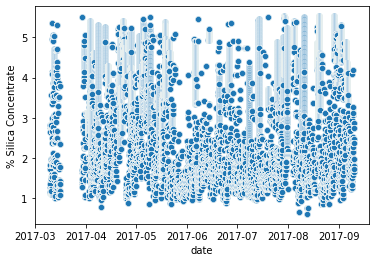

In [14]:
# Avaliar a quantidade de medições no período considerado na base
sns.scatterplot(x=df.date,y=df['% Silica Concentrate'])

<AxesSubplot:xlabel='date', ylabel='% Silica Concentrate'>

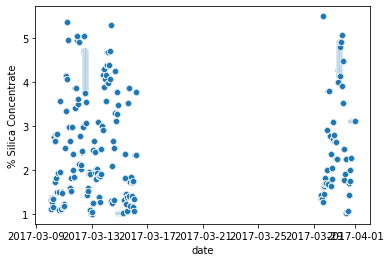

In [15]:
# Avaliar os dias sem registro dos dados, no mês 03
df3 = df.loc[df['date'].dt.month==3]
sns.scatterplot(x=df3.date,y=df3['% Silica Concentrate'])

- Fica claro, através dos gráficos acima, que faltam dados de alguns dias do mês 03. Isso vai causar um número menor de observações válidas ao final do processo de tratamento da base.

In [16]:
# Selecionar apenas os 3 horários de interesse para cada dia (onde todas as features foram de fato mensuradas)
conditions = [(df.date.dt.hour == 1), (df.date.dt.hour == 7), (df.date.dt.hour == 16)]
choices = [1, 1, 1]
df['MediçãoVálida'] = np.select(conditions, choices, default= 0)
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,MediçãoVálida
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31,1
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31,1
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31,1
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31,1
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31,1


In [17]:
# Criar novo DataFrame apenas com os registros considerados válidos, segundo as premissas adotadas acima
df_valid = df[df.MediçãoVálida == 1]
df_valid = df_valid.drop_duplicates(subset='date')
df_valid = df_valid.drop(labels=['MediçãoVálida'], axis=1).reset_index(drop=True)
print('Número de Linhas: ', df_valid.shape[0])
print('Número de Colunas: ', df_valid.shape[1])
df_valid.head()

Número de Linhas:  512
Número de Colunas:  24


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 07:00:00,54.95,17.40,3446.19,624.023,400.781,10.06940,1.76633,250.620,253.037,...,250.181,539.326,546.130,550.556,550.232,543.402,583.580,559.484,65.76,2.76
2,2017-03-10 16:00:00,55.99,17.16,5381.45,511.475,386.133,10.22790,1.78828,252.246,255.981,...,249.829,550.037,548.850,551.960,557.810,564.550,588.620,537.960,67.30,1.51
3,2017-03-11 01:00:00,60.66,8.25,5401.56,340.698,408.574,10.21640,1.65959,248.423,252.466,...,250.093,545.232,556.440,542.358,203.945,459.348,546.732,453.326,67.44,1.17
4,2017-03-11 07:00:00,59.89,8.98,2514.94,329.865,395.947,9.70634,1.64552,248.950,249.258,...,249.313,550.737,546.045,534.156,635.627,608.507,543.204,648.733,63.33,4.96


## Análise Exploratória dos Dados

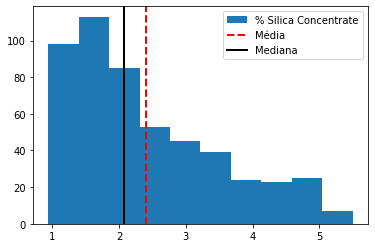

In [18]:
# Distribuição de frequência da Target
plt.hist(df_valid['% Silica Concentrate'], label='% Silica Concentrate')
plt.axvline(df_valid['% Silica Concentrate'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(df_valid['% Silica Concentrate'].median(), color='black', linewidth=2, label='Mediana')
plt.legend()
plt.show()

- Claramente temos uma distribuição Assimétrica à Direita, o que é confirmado visualmente - pelo histograma - e também com a mediana sendo menor que a média.
- Alguns algorítimos não são bons nesse tipo de caso, como é o exemplo da regressão linear. Logo, serão testados modelos que lidem bem com esta característica.

Média da target no período: 2.407558827627344


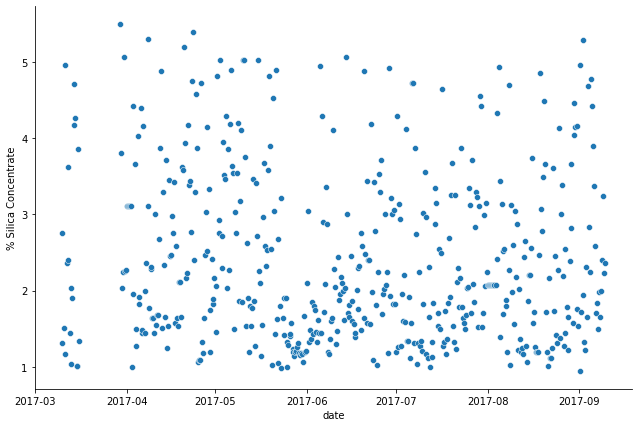

In [19]:
# Avaliar a distribuição da target no tempo
m = df_valid['% Silica Concentrate'].mean()
print(f'Média da target no período: {m}')
sns.pairplot(df_valid, y_vars='% Silica Concentrate', x_vars=['date'], height=6, aspect=1.5)

- A distribuição da feature target mostrou-se assimétrica à direita e, segundo o gráfico acima, SEM correlação clara com a data. 
- Nesta abordagem, portanto, o problema não será tratado como uma série temporal.
- Em todo o perído os valores tendem a ficar abaixo de 3 (mostrando mais uma vez a assimetria), mas de forma constante em todo no intervalo de tempo. 

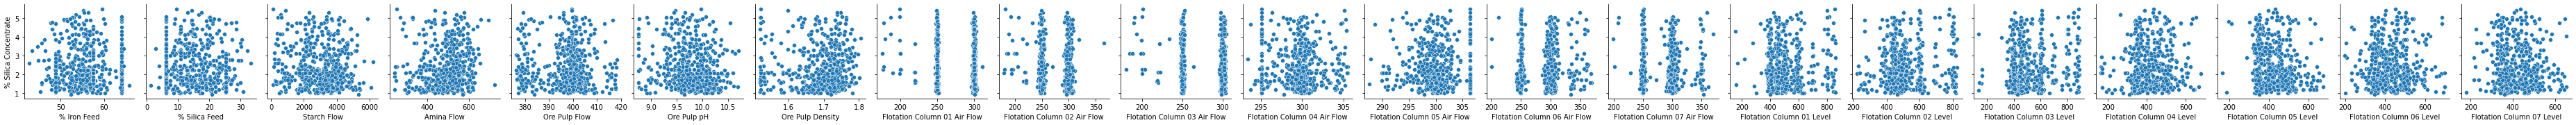

In [20]:
# Pairplot para avaliar visualmente a relação entre as features e a target
col = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 
       'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 
       'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level']

ax = sns.pairplot(df_valid, y_vars='% Silica Concentrate', x_vars=col)

- A maioria das correlações são não lineares!

- As colunas de ar 1, 2 e 3 parecem trabalhar em valores constantes: 250 Nm³/h e 300 Nm³/h, apresentando muito pouca variação. Esse comportamento acontece também nas colunas de ar 6 e 7, que parece assumir basicamente 3 valores: 250 Nm³/h, 300 Nm³/h e 350 Nm³/h.

- Buscando avaliar o real impacto dessas features, e também de outras features que não apresentam uma clara relação com a target, vou realizar o ajuste de um modelo Decision Tree para determinar se algumas features podem ser retiradas da base, tornando mais claro o entendimento do comportamento da target para o modelo.

<AxesSubplot:>

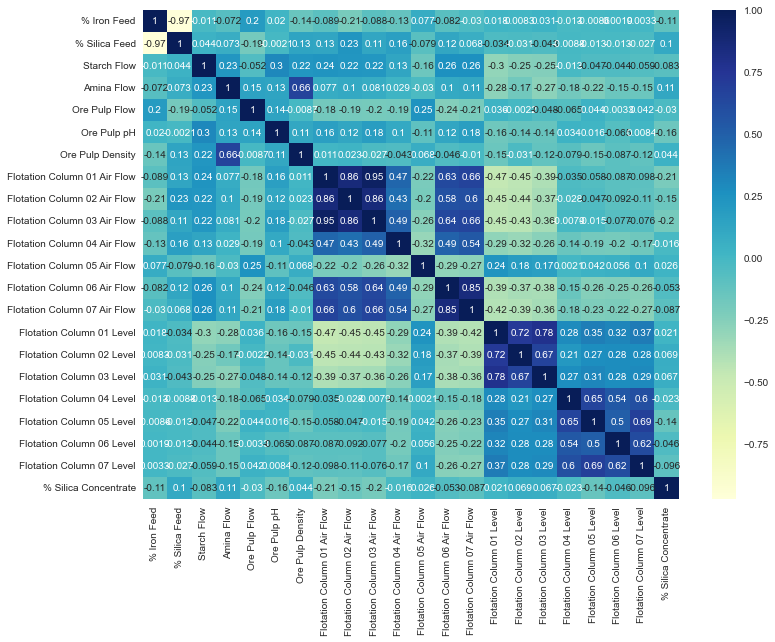

In [136]:
# Análise inicial de Correlação entre as Features
corr = df_valid.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, 
           yticklabels=corr.columns,
           xticklabels=corr.columns,
           annot=True,
           cmap='YlGnBu')

- Parece existir uma clara correlação entre **'% Silica Concentrate'** e os níveis de **'% Iron Feed'**, **'Starch Flow'** e **'Amina Flow'**. 
- Vou avaliar plotando as 3 features juntas com o nível de Sílica.

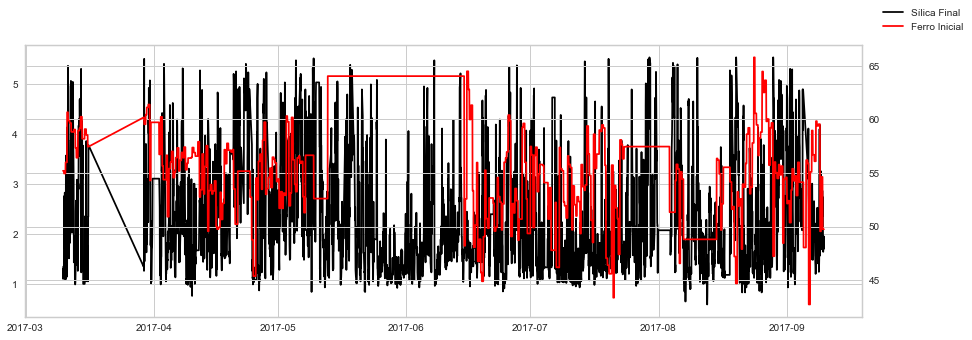

In [135]:
# Plotar correlação entre Silica Concentrate e Iron Feed
left_data = df.groupby(df.date)['% Silica Concentrate'].mean()
right_data = df.groupby(df.date)['% Iron Feed'].mean()
fig, ax_left = plt.subplots(figsize=(15,5))
ax_right = ax_left.twinx()
ax_left.plot(left_data, label = "Sílica Final", color='black')
ax_right.plot(right_data, label = "Ferro Inicial", color='red')
fig.legend()

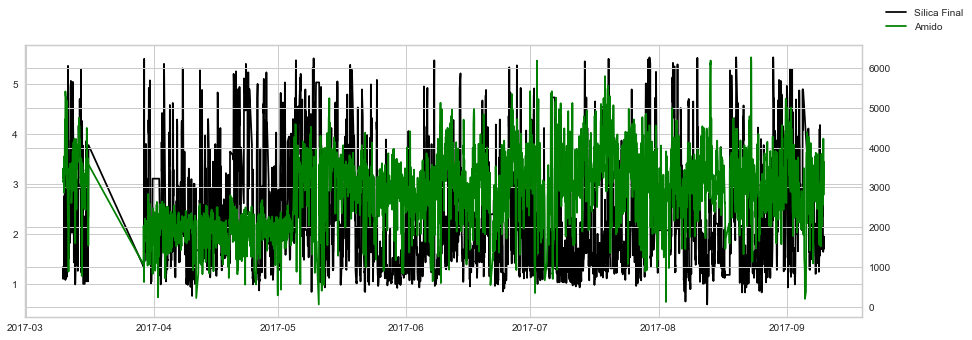

In [97]:
# Plotar correlação entre Silica Concentrate e Starch Flow
left_data = df.groupby(df.date)['% Silica Concentrate'].mean()
right_data = df.groupby(df.date)['Starch Flow'].mean()
fig, ax_left = plt.subplots(figsize=(15,5))
ax_right = ax_left.twinx()
ax_left.plot(left_data, label = "Sílica Final", color='black')
ax_right.plot(right_data, label = "Amido", color='green')
fig.legend()

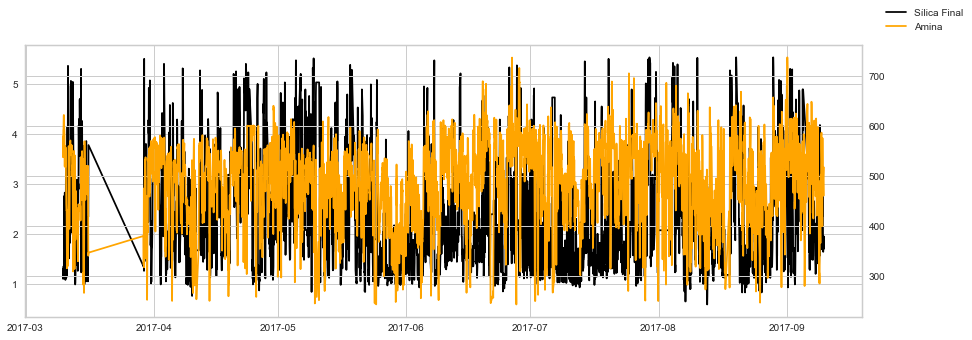

In [100]:
# Plotar correlação entre Silica Concentrate e Amina Flow
left_data = df.groupby(df.date)['% Silica Concentrate'].mean()
right_data = df.groupby(df.date)['Amina Flow'].mean()
fig, ax_left = plt.subplots(figsize=(15,5))
ax_right = ax_left.twinx()
ax_left.plot(left_data, label = "Sílica Final", color='black')
ax_right.plot(right_data, label = "Amina", color='orange')
fig.legend()

- Parace haver uma clara correlação inversa entre '% Silica Concentrate' a as features 'Starch Flow' e 'Amina Flow'.
- Vou deletar 2 colunas que não serão utilizadas na previsão da qualidade do minério: '% Iron Concentrate' **já que esta feature é altamente correlacionada com a target** e não será alvo da nossa previsão, e também a coluna 'Date' já que não se trata de um problema de série temporal.

In [25]:
# Vou deletar a colunas que não serão consideradas na análise
df_valid = df_valid.drop(labels=['date', '% Iron Concentrate'], axis=1)
print('Número de Linhas: ', df_valid.shape[0])
print('Número de Colunas: ', df_valid.shape[1])
df_valid.head()

Número de Linhas:  512
Número de Colunas:  22


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
1,54.95,17.40,3446.19,624.023,400.781,10.06940,1.76633,250.620,253.037,251.279,...,250.093,250.181,539.326,546.130,550.556,550.232,543.402,583.580,559.484,2.76
2,55.99,17.16,5381.45,511.475,386.133,10.22790,1.78828,252.246,255.981,249.390,...,249.829,249.829,550.037,548.850,551.960,557.810,564.550,588.620,537.960,1.51
3,60.66,8.25,5401.56,340.698,408.574,10.21640,1.65959,248.423,252.466,251.807,...,249.521,250.093,545.232,556.440,542.358,203.945,459.348,546.732,453.326,1.17
4,59.89,8.98,2514.94,329.865,395.947,9.70634,1.64552,248.950,249.258,248.950,...,248.895,249.313,550.737,546.045,534.156,635.627,608.507,543.204,648.733,4.96


## Ajuste do Modelo
- Como a maioria das correlações se mostraou não linear, além da variável target apresentar distribuição assimétrica, vou utilizar um modelo mais robusto: Decision Tree Regressor. Dessa forma, não será necessário fazer a Normalização dos dados.
- Vou avaliar o erro com o **RMSE**, pois este caso **penaliza os erros maiores**, que é exatamente o que queremos evitar no caso da concentração de Silica.

In [27]:
# Criar a matriz com as features e o vetor com a classe target
X = df_valid.drop('% Silica Concentrate', axis = 1)
y = df_valid['% Silica Concentrate']  

# Dividir a base em Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [28]:
# Baseline com Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
base_model = DecisionTreeRegressor(random_state=25)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

# RMSE - Métrica base da avaliação e que será alvo da minimização
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
erro_mean = mse(y_test, y_pred, squared=False)
erro_mean

1.509699929794124

In [29]:
# Median Absolute Error - Métrica de comparação para identificação de outliers
from sklearn.metrics import median_absolute_error as mdae
erro_median = mdae(y_test, y_pred)
erro_median

1.0700000000000003

- Essa diferença grande entre o **RMSE** e o erro **Median Absolute Error** pode indicar a presença de outliers na base. Vou avaliar a variável target com um boxplot e tentar identificar quais são os outliers.

<AxesSubplot:>

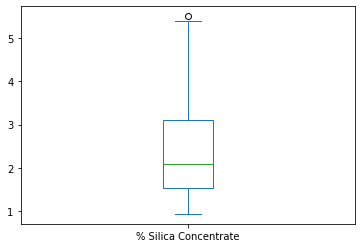

In [30]:
# Boxplot da features target para avaliação visual
df_valid['% Silica Concentrate'].plot(kind='box')

In [31]:
# Avaliar quantos registros maiores que 5 existem na base
df_valid[df_valid['% Silica Concentrate'] > 5]

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
19,59.54,9.56,145.349632,252.088000,399.484000,9.96978,1.521080,199.072000,182.430000,201.251000,...,250.488000,250.760000,853.745107,782.419299,883.715800,435.285000,434.663000,452.469000,436.865000,5.500000
23,54.30,20.14,2592.610000,555.143000,400.755000,9.62548,1.751000,199.881000,192.930000,200.301000,...,250.039000,250.728000,814.748000,803.652000,803.931000,437.766000,443.487000,458.308000,464.534000,5.070000
47,56.42,13.11,2325.970000,481.567000,396.094000,9.66418,1.747300,250.249000,252.246000,252.026000,...,249.829000,249.829000,614.600000,603.789000,843.937652,461.719000,440.625000,467.089000,461.270000,5.300000
84,53.51,16.52,597.237357,540.771000,396.081000,9.79724,1.738820,249.868000,247.335000,251.338000,...,250.049000,247.192000,585.615000,775.033743,607.534000,264.453000,351.949000,398.202000,327.744000,5.200000
93,55.17,14.35,899.649800,437.169000,399.628000,9.47010,1.597710,249.353000,249.489000,252.246000,...,250.857000,249.866000,799.716000,597.724000,606.281000,388.456000,399.085000,403.839000,416.417000,5.399171
121,52.92,19.99,423.112051,325.914515,394.365333,9.29908,1.632985,300.366000,298.895000,297.736000,...,306.704000,299.861000,540.329000,723.365000,727.013000,450.627000,466.265000,477.705000,437.194000,5.030000
144,52.61,20.24,2109.725063,268.101000,399.773000,9.39509,1.520208,249.773000,250.601000,250.471000,...,299.927000,301.296000,441.305000,432.272000,452.782000,359.892000,333.136000,334.642000,346.790000,5.030000
145,52.61,20.24,630.348496,329.629642,405.137718,8.91612,1.520851,186.903359,206.311013,190.567157,...,211.784899,208.045441,800.246184,692.587394,839.668672,651.880061,414.534602,685.269333,397.528438,5.030000
159,64.03,6.26,4182.630000,576.206000,401.375000,9.76186,1.763990,249.227000,247.885000,251.319000,...,297.290000,299.268000,459.558000,444.488000,453.652000,360.404000,356.568000,362.871000,353.094000,5.030000
248,64.03,6.26,3398.130000,560.712000,390.493000,10.07170,1.681090,300.378000,294.607000,300.990000,...,299.615000,300.795000,433.947000,807.445000,878.348235,492.102000,496.397000,499.399000,490.055000,5.070194


- Vou tratar os valores **maiores ou iguais a 5.1 como outliers** e retirá-los da base. 
- Vou avaliar novamente os 2 erros, a fim de entender se o impacto desses outliers foi minimizado.

In [139]:
df_valid2 = df_valid[df_valid['% Silica Concentrate'] < 5.1]

# Criar a matriz com as features e o vetor com a classe target
X2 = df_valid2.drop('% Silica Concentrate', axis = 1)
y2 = df_valid2['% Silica Concentrate']  

# Dividir a base em Treino e Teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=30)

In [140]:
# Baseline com Decision Tree Regressor
base_model2 = DecisionTreeRegressor(random_state=29)
base_model2.fit(X_train2, y_train2)
y_pred2 = base_model2.predict(X_test2)

# RMSE - Métrica base da avaliação e que será alvo da minimização
erro_mean2 = mse(y_test2, y_pred2, squared=False)
erro_mean2

1.453002300572135

In [141]:
# Median Absolute Error - Métrica de comparação para identificação de outliers
erro_median2 = mdae(y_test2, y_pred2)
erro_median2

0.975

In [35]:
# Média e Desvio padrão da feature target
mean = np.mean(y2)
std = np.std(y2)
print(mean, std)

2.3786606478786982 1.0759367853664985


Text(0.5, 0, 'feature')

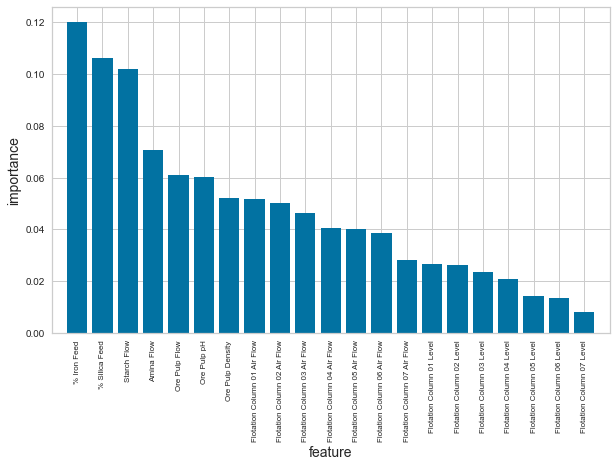

In [142]:
# Plotar Feature Importances 
importances = base_model2.feature_importances_
indices = np.argsort(importances)[::-1]
f, ax = plt.subplots(figsize=(10, 6))
plt.bar(range(X_train2.shape[1]), importances[indices],
    color="b", 
    align="center")
feature_names = X_train2.columns
plt.xticks(range(X_train2.shape[1]), feature_names, fontsize = 8, rotation=90)
plt.xlim([-1, X_train2.shape[1]])
plt.ylabel("importance", fontsize = 14)
plt.xlabel("feature", fontsize = 14)

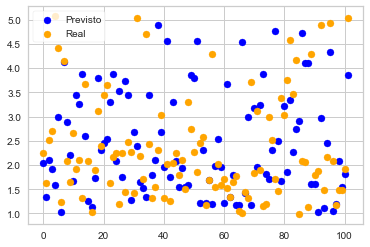

In [161]:
# Confrontar valores Previstos com valores Reais
plt.scatter(range(len(y_pred2)), y_pred2, color='blue', label='Previsto')
plt.scatter(range(len(y_test2)), y_test2, color='orange', label='Real')
plt.legend(loc='best', frameon=True)
plt.show()

- Considerando o valor da média, o desempenho do modelo está aceitável, ainda mais sendo um simples modelo de decision tree. 
- Mas algumas coisas podem ser feitas para tentar melhorar a generalização do modelo: Reduzir a dimensionalidade e Tuning do modelo, buscando os melhor hiper parâmetros.
- Algumas features não explicam quase nada para o modelo, de modo que praticamente todas as features foram utilizadas com uma pequena contribuição.

In [162]:
# Tuning do Modelo Decision Tree

tun_tree = DecisionTreeRegressor()
parametros = {'min_samples_leaf':[2, 3, 4, 5, 6], 'max_depth':[3, 4, 5, 6, 7], 'max_leaf_nodes':[3, 4, 5, 6]}
grid = GridSearchCV(estimator=tun_tree, param_grid=parametros, scoring='neg_root_mean_squared_error', cv=4)

# Validando o Modelo
grid.fit(X_train2, y_train2)
print(pd.DataFrame(grid.cv_results_)[['rank_test_score','mean_test_score']].sort_values('rank_test_score').head(5))
print(f'Melhores parâmetros: {grid.best_params_}')

    rank_test_score  mean_test_score
14                1        -1.115774
19                2        -1.120168
0                 3        -1.124414
43                3        -1.124414
44                3        -1.124414
Melhores parâmetros: {'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 6}


In [163]:
# Modelo Tunado
tun_tree = DecisionTreeRegressor(max_depth=3, max_leaf_nodes=5, min_samples_leaf=6, random_state=12)
tun_tree.fit(X_train2, y_train2)
y_pred_tun = tun_tree.predict(X_test2)

# RMSE 
erro_mean_tun = mse(y_test2, y_pred_tun, squared=False)
erro_mean_tun

1.1976607738547085

In [164]:
# Median Absolute Error - Métrica de comparação para identificação de outliers
erro_median2 = mdae(y_test2, y_pred_tun)
erro_median2

0.7759896466928639

Text(0.5, 0, 'feature')

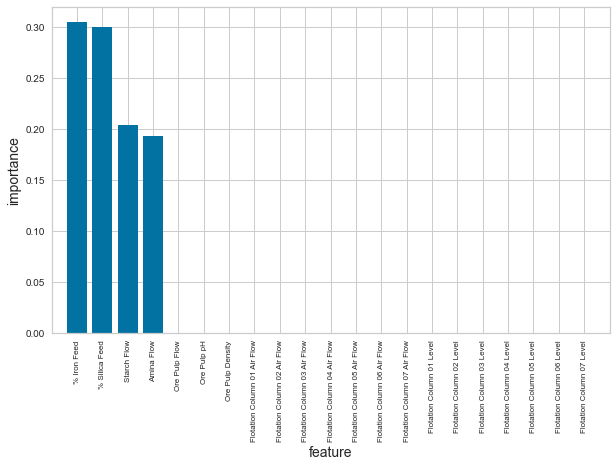

In [167]:
# Plotar Feature Importances 
importances = tun_tree.feature_importances_
indices = np.argsort(importances)[::-1]
f, ax = plt.subplots(figsize=(10, 6))
plt.bar(range(X_train2.shape[1]), importances[indices],
    color="b", 
    align="center")
feature_names = X_train2.columns
plt.xticks(range(X_train2.shape[1]), feature_names, fontsize = 8, rotation=90)
plt.xlim([-1, X_train2.shape[1]])
plt.ylabel("importance", fontsize = 14)
plt.xlabel("feature", fontsize = 14)

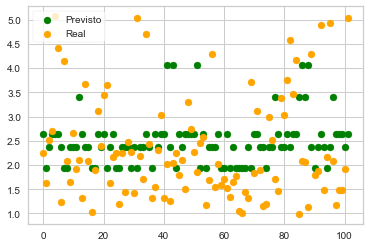

In [166]:
# Confrontar valores Previstos com valores Reais
plt.scatter(range(len(y_pred_tun)), y_pred_tun, color='green', label='Previsto')
plt.scatter(range(len(y_test2)), y_test2, color='orange', label='Real')
plt.legend(loc='upper left', frameon=True)
plt.show()

- Quando avaliamos a distribuição dos Dados de Previsão, fica perceptível que o modelo não conseguiu capturar as correlações dos dados.
- Como as correlações não são lineares, é necessário um número maior de instâncias para que o modelo consiga generalizar melhor.
- Não é indicado ajustar um modelo muito complexo em uma base tão pequena, foi seria muito fácil cair em overfitting. 
- É necessário aumentar a disponibilidade de dados.

## Abordagem Alternativa
- Como os maiores limitadores da disponibilidade de dados são '% Iron Feed' e '% Silica Feed', preciso avaliar uma abordagem sem essas features.
- Preciso avaliar qual a distribuição dessas features, e ver se elas seguem o padrão aproximado da normal com um pequeno desvio padrão.

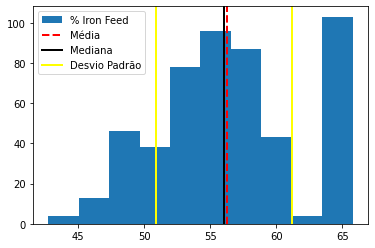

In [50]:
# Distribuição de frequência da feature '% Iron Feed'
plt.hist(df_valid['% Iron Feed'], label='% Iron Feed')
plt.axvline(df_valid['% Iron Feed'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(df_valid['% Iron Feed'].median(), color='black', linewidth=2, label='Mediana')
plt.axvline(x=df_valid['% Iron Feed'].median() - df_valid['% Iron Feed'].std(), color='yellow', linewidth=2, label='Desvio Padrão')
plt.axvline(x=df_valid['% Iron Feed'].median() + df_valid['% Iron Feed'].std(), color='yellow', linewidth=2)
plt.legend()
plt.show()

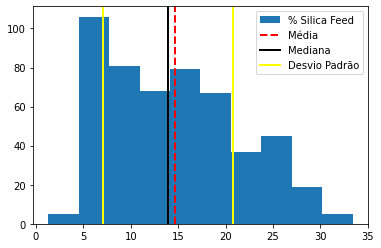

In [51]:
# Distribuição de frequência da feature '% Silica Feed'
plt.hist(df_valid['% Silica Feed'], label='% Silica Feed')
plt.axvline(df_valid['% Silica Feed'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(df_valid['% Silica Feed'].median(), color='black', linewidth=2, label='Mediana')
plt.axvline(x=df_valid['% Silica Feed'].median() - df_valid['% Silica Feed'].std(), color='yellow', linewidth=2, label='Desvio Padrão')
plt.axvline(x=df_valid['% Silica Feed'].median() + df_valid['% Silica Feed'].std(), color='yellow', linewidth=2)
plt.legend()
plt.show()

- As distribuições não são exatamente normais, mas tem um perfil parecido com normal.
- Os valores de média e mediana são praticamente iguais, além do pefil da distribuição ter aparência próxima à normal.
- Isto posto, vou considerar que essas 2 features tem uma distribuição normal, com baixa variância, e retirá-las da base.
- Como essas features limitam muito a disponibilidade dos dados, vou testar a regra de delimitar as **medições a cada hora**, deletando as 2 features em questão. 
- Isso vai aumentar de forma substancial a disponibilidade de dados e pode ajudar o modelo a generalizar melhor, além de permitir o ajuste de um modelo de maior capacidade.

In [52]:
# Criar novo dataframe mantendo a primeira medição de cada hora, segundo análise laboratorial da '% Silica Concentrate'
df_test = df.drop_duplicates(subset=['date']) #por padrão mantém a primeira instância
df_test = df_test.drop(labels=['date', '% Iron Feed','% Silica Feed', '% Iron Concentrate', 'MediçãoVálida'], axis=1)
df_test = df_test[df_test['% Silica Concentrate'] < 5.1]
print('Número de Linhas: ', df_test.shape[0])
print('Número de Colunas: ', df_test.shape[1])
df_test.head()

Número de Linhas:  4022
Número de Colunas:  20


,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,3019.530,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
174,3170.410,539.673,399.697,10.15890,1.66910,249.291,248.269,248.313,295.096,306.4,250.488,249.774,462.601,488.724,441.674,433.629,448.477,480.866,489.382,1.11
354,3365.650,573.517,399.023,10.08600,1.70565,249.379,253.312,252.092,295.096,306.4,250.829,249.060,456.445,440.432,456.625,432.736,464.334,445.950,432.906,1.27
534,2693.750,592.133,409.204,9.94880,1.72472,248.302,251.906,251.115,295.096,306.4,252.081,249.236,459.248,480.114,453.814,433.885,438.642,421.974,408.193,1.36
714,2352.216,601.807,398.145,9.84375,1.75928,248.950,246.313,248.071,295.096,306.4,252.686,252.686,558.545,548.280,551.960,561.720,543.070,529.260,514.240,1.34


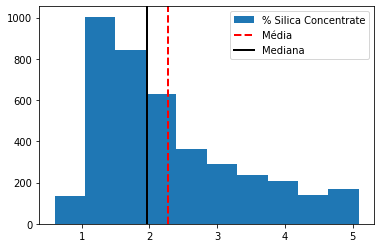

In [53]:
# Distribuição de frequência da Target
plt.hist(df_test['% Silica Concentrate'], label='% Silica Concentrate')
plt.axvline(df_test['% Silica Concentrate'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(df_test['% Silica Concentrate'].median(), color='black', linewidth=2, label='Mediana')
plt.legend()
plt.show()

- A distribuição da feature target continua assimétrica à direita, mas um pouco menos que na abordagem anterior.
- Resta agora ajustar o modelo e avaliar a generalização.

In [54]:
# Criar a matriz com as features e o vetor com a classe target
X_new = df_test.drop('% Silica Concentrate', axis = 1)
y_new = df_test['% Silica Concentrate']  

# Dividir a base em Treino e Teste
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.30, random_state=42)

# Baseline com Decision Tree Regressor
model_new = DecisionTreeRegressor(random_state=40)
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)

# RMSE - Métrica base da avaliação e que será alvo da minimização
erro_mean_new = mse(y_test_new, y_pred_new, squared=False)
erro_mean_new

1.3175703282727025

- Resultado melhorou em relação à abordagem anterior.
- Vamos avaliar com o ajuste dos hiperparâmetros. 

In [55]:
# Tuning New Modelo Decision Tree

new_tree = DecisionTreeRegressor()
parametros = {'min_samples_leaf':[2, 3, 4, 5, 6], 'max_depth':[3, 4, 5, 6, 7], 'max_leaf_nodes':[3, 4, 5, 6]}
grid = GridSearchCV(estimator=new_tree, param_grid=parametros, scoring='neg_root_mean_squared_error', cv=5)

# Validando o Modelo
grid.fit(X_train_new, y_train_new)
print(pd.DataFrame(grid.cv_results_)[['rank_test_score','mean_test_score']].sort_values('rank_test_score').head(5))
print(f'Melhores parâmetros: {grid.best_params_}')

    rank_test_score  mean_test_score
99                1        -1.012337
55                1        -1.012337
98                1        -1.012337
58                1        -1.012337
59                1        -1.012337
Melhores parâmetros: {'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 2}


In [56]:
# Tuning Decision Tree Regressor
tun_new_model = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, random_state=20)
tun_new_model.fit(X_train_new, y_train_new)
y_tun_new = tun_new_model.predict(X_test_new)

# RMSE 
erro_mean_new_tun = mse(y_test_new, y_tun_new, squared=False)
erro_mae_new_tun = mae(y_test_new, y_tun_new)
print('RMSE: {} | MAE: {}'.format(erro_mean_new_tun, erro_mae_new_tun))

RMSE: 1.0222159670980273 | MAE: 0.8223520986540613


- A segunda abordagem apresentou um nível de erro aceitável (+- 1), ainda mais considerando que foi utilizado apenas um modelo simples de Decision Tree.
- O modelo sem as 2 primeiras features pôde ser treinado com um número muito maior de instâncias e conseguiu generalizar melhor.
- Resta avaliar a qualidade da previsão e quais as features tiveram maior impacto nesse resultado.

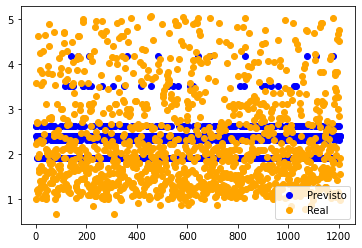

In [57]:
# Confrontar valores Previstos com valores Reais
plt.scatter(range(len(y_tun_new)), y_tun_new, color='blue', label='Previsto')
plt.scatter(range(len(y_test_new)), y_test_new, color='orange', label='Real')
plt.legend(loc='lower right')
plt.show()

- Ainda que o modelo Decision Tree tenha apresentado bons resultados, parece que ele não foi capaz de capturar toda a complexidade dos dados.
- Ainda assim, ele serve como bom baseline e também para ajudar na Redução de Dimensionalidade.
- É necessário, portanto, ajustar um modelo com maior capacidade para capturar melhor a complexidade dos dados.

Text(0.5, 0, 'feature')

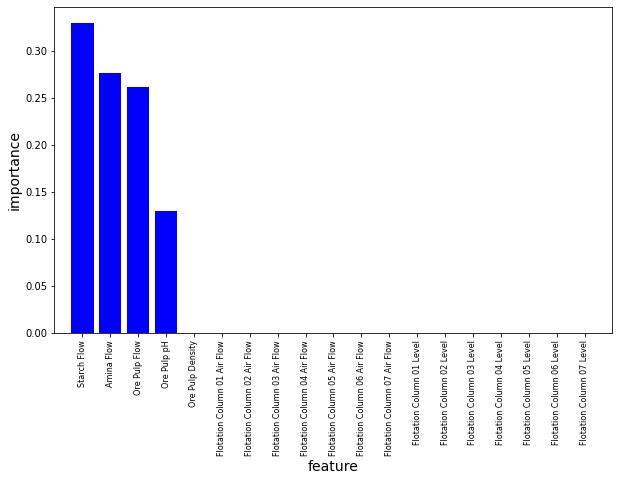

In [58]:
# Plotar Feature Importances 
importances = tun_new_model.feature_importances_
indices = np.argsort(importances)[::-1]
f, ax = plt.subplots(figsize=(10, 6))
plt.bar(range(X_train_new.shape[1]), importances[indices],
    color="b", 
    align="center")
feature_names = X_train_new.columns
plt.xticks(range(X_train_new.shape[1]), feature_names, fontsize = 8, rotation=90)
plt.xlim([-1, X_train_new.shape[1]])
plt.ylabel("importance", fontsize = 14)
plt.xlabel("feature", fontsize = 14)

## Discussão
- Ao contrário da primeira abordagem, nesse caso as features tiveram grande relevância para o modelo (> 0.35).
- Basta encontrar o menor intervalo onde todas as features tenham medições, e será possível fazer previsões a cada intervalo deste tempo.
- Considerando que as características de solo não sofram muita variação, e o minério de determinada mina tenha um valor médio de qualidade de ferro e sílica, torna-se viável o ajuste do modelo sem as 2 prmeiras features: **'% Iron Feed'** e **'% Silica Feed'**. Isto proporciona uma maior quantidade de instâncias válidas, o que permite a geração de um **modelo mais estável**.
- Caso as característcas do solo tenham uma variação muito grande, a primeira proposta é a mais indicada, ainda que muitas instâncias sejam perdidas. 
- Pode-se avaliar a exclusão de algumas features com quase nenhuma relevância para o modelo, segundo gráfico acima. Isto porque, além de serem altamente correlacionadas entre si, estas features assumem - em grande parte do tempo - valores constantes e acabam se tornando irrelevantes para o modelo (já que são muito bem controladas).
- A partir desse ponto é possível o ajuste de modelos mais robustos, como Random Forest, XGBoost ou Ensembles de modelos, buscando minimizar a métrica escolhida. 

## Ajuste com Random Forest
- Agora que o entendimento dos dados e da importância das features está bastante claro, é possível ajustar o modelo Random Forest, sem que o overfitting seja um problema não percebido. 
- A escolha pelo Random Forest segue a mesma ideia de que os modelos de árvore são bons com relações não lineares e resistentes à overfitting, além de não ser necessário normalização dos dados. 

In [59]:
# Validação Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
param = {'n_estimators':[100, 400, 500, 700], 
         'max_depth':[3, 4, 5], 
         'min_samples_leaf':[2, 3, 4], 
         'max_features':['auto', 'sqrt']}
grid = GridSearchCV(estimator=rf_model, param_grid=param, scoring='neg_root_mean_squared_error', cv=5)

# Rodar a validação
grid.fit(X_train_new, y_train_new)
print(pd.DataFrame(grid.cv_results_)[['rank_test_score','mean_test_score']].sort_values('rank_test_score').head(5))
print(f'Melhores parâmetros: {grid.best_params_}')

    rank_test_score  mean_test_score
55                1        -0.951348
59                2        -0.951412
50                3        -0.951527
53                4        -0.951531
54                5        -0.951663
Melhores parâmetros: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 700}


## Avaliação da Qualidade das Previsões

In [60]:
# Avaliar o Random Forest model
tun_rf = RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=3, n_estimators=700)
tun_rf.fit(X_train_new, y_train_new)
y_pred_rf = tun_rf.predict(X_test_new)

# Comparação entre as Métricas 
rmse_rf = mse(y_test_new, y_pred_rf, squared=False)
mae_rf = mae(y_test_new, y_pred_rf)
median_rf = mdae(y_test_new, y_pred_rf)

print('RMSE: {} | MAE: {} | MEAE: {}'.format(rmse_rf, mae_rf, median_rf))

RMSE: 0.9664791848240124 | MAE: 0.7735565586033815 | MEAE: 0.6472724271583761


- Os valores de erros estão aceitáveis para o problema em questão.
- A proximidade entre essas métricas indica boa generalização do modelo.
- Resta saber da consistência e distribuição do erro.

Text(0.5, 0, 'feature')

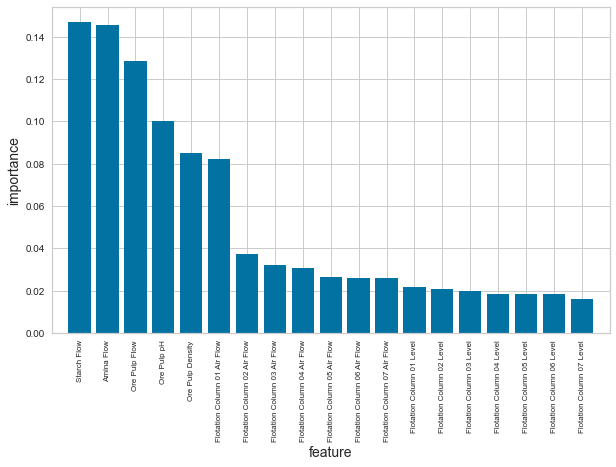

In [168]:
# Plotar Feature Importances 
importances = tun_rf.feature_importances_
indices = np.argsort(importances)[::-1]
f, ax = plt.subplots(figsize=(10, 6))
plt.bar(range(X_train_new.shape[1]), importances[indices],
    color="b", 
    align="center")
feature_names = X_train_new.columns
plt.xticks(range(X_train_new.shape[1]), feature_names, fontsize = 8, rotation=90)
plt.xlim([-1, X_train_new.shape[1]])
plt.ylabel("importance", fontsize = 14)
plt.xlabel("feature", fontsize = 14)

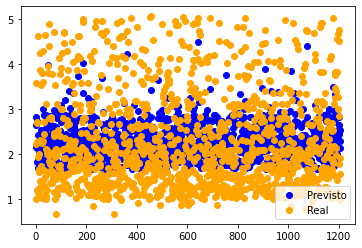

In [61]:
# Confrontar valores Previstos com valores Reais
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='blue', label='Previsto')
plt.scatter(range(len(y_test_new)), y_test_new, color='orange', label='Real')
plt.legend(loc='lower right')
plt.show()

- Este modelo conseguiu capturar melhor a complexidade dos dados.
- A utilização do RMSE como métrica faz com que o modelo penalize mais erros maiores.
- É provável que mesmo o modelo estando com um bom ajuste, as métricas clássicas de regressão demonstrem um modelo com péssimo desempenho.
- Isto ocorre pela existência de **correlações não lineares** entre praticamente todas as features e a target.
- Vamos avaliar o modelo segundo as métricas clássicas de regressão, abaixo.

d:\DataScience\TesteIHM\ihm\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


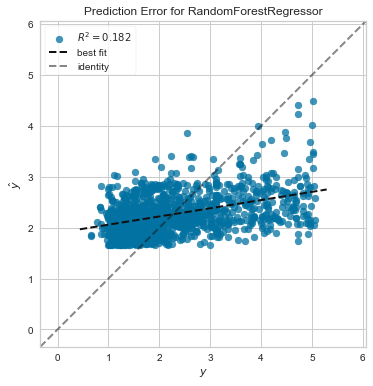

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [67]:
# Gráfico Erro de Predição
from yellowbrick.regressor import PredictionError, residuals_plot
fig, ax = plt.subplots(figsize=(6,6))
pev = PredictionError(tun_rf)
pev.fit(X_train_new, y_train_new)
pev.score(X_test_new,y_test_new)
pev.show()

d:\DataScience\TesteIHM\ihm\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


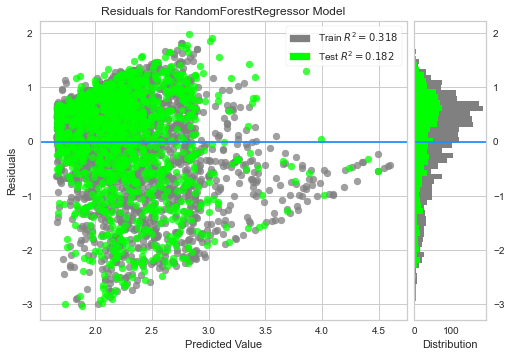

AttributeError: 'RandomForestRegressor' object has no attribute 'line_color'

AttributeError: 'RandomForestRegressor' object has no attribute 'line_color'

In [73]:
# Gráfico de Resíduos
residuals_plot(tun_rf, X_train_new, y_train_new, X_test_new, y_test_new, train_color="grey", test_color="lime", line_color="dodgerblue")

- É perceptível, através da avaliação do **Gráfico de Erro de Predição** e do **Gráfico de Resíduos**, que os erros não têm distribuição normal.
- Este é o motivo pelo qual a regressão linear (e suas métricas) não são bons nesse tipo de situação. Pois, ainda que os Gráficos e o R² indiquem um modelo com péssimo desempenho, não é isto que está acontecendo na realidade.